In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd 

$$y=a sin(b-x)+cx^2+d $$


In [2]:
df = pd.read_csv("dataCF.csv", delimiter=',', skiprows=0, low_memory=False)
print(df)
print(df.iloc[1,1])

          x       y  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0   107.608  60.323         NaN         NaN         NaN         NaN
1   108.632  61.122         NaN         NaN         NaN         NaN
2   109.773  60.171         NaN         NaN         NaN         NaN
3   110.929  61.187         NaN         NaN         NaN         NaN
4   112.075  63.221         NaN         NaN         NaN         NaN
5   113.270  63.639         NaN         NaN         NaN         NaN
6   115.094  64.012         NaN         NaN         NaN         NaN
7   116.219  63.761         NaN         NaN         NaN         NaN
8   117.388  66.019         NaN         NaN         NaN         NaN
9   118.734  67.857         NaN         NaN         NaN         NaN
10  120.445  67.869         NaN         NaN         NaN         NaN
11  121.950  66.913         NaN         NaN         NaN         NaN
12  123.366  68.655         NaN         NaN         NaN         NaN
13  125.368  69.564         NaN         NaN     

In [3]:
model = AbstractModel()
model.N =Param(mutable=True) 
model.i = RangeSet(1,model.N)
def initbound(model):
    return (-100,100)
model.a = Var( bounds=initbound,within=Reals)
model.b = Var( bounds=initbound,within=Reals)
model.c = Var( bounds=initbound,within=Reals)
model.d = Var( bounds=initbound,within=Reals)

model.OF = Var(within=NonNegativeReals, initialize=5)
def initvalx(model,i):
    return df.iloc[i-1,0]
def initvaly(model,i):
    return df.iloc[i-1,1]


model.Xloc=Param(model.i,  within=NonNegativeReals, initialize=initvalx,mutable=True)
model.Yloc=Param(model.i,  within=NonNegativeReals, initialize=initvaly, mutable=True)

def rule_OF(model):
    return model.OF==sum((model.a*sin(model.b-model.Xloc[i]) +model.c*model.Xloc[i]**2 +model.d-model.Yloc[i])**2 for i in model.i)
model.C   = Constraint(rule=rule_OF)

model.obj1 = Objective(expr=model.OF, sense=minimize)


In [4]:
opt = SolverFactory('Ipopt')

In [5]:
model.N=len(df)
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
print('OF= ',value(instance.obj1))

OF=  7.406758504844819


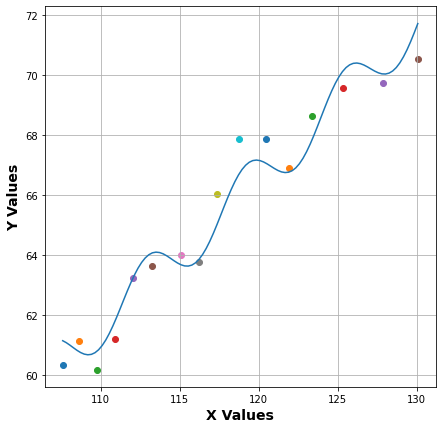

In [11]:
fig = plt.figure(figsize=(7,7))
XC=np.linspace(min(df['x']),max(df['x']),100);

Yc=[]
for Xc in XC:
    Yc.append(value(instance.a)*sin(value(instance.b)-Xc)+value(instance.c)*Xc**2+value(instance.d))
plt.plot(XC,Yc)
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),label=str(i))  
plt.xlabel('X Values', fontweight='bold', fontsize=14)
plt.ylabel('Y Values', fontweight='bold', fontsize=14)
plt.grid()